In [1]:
import clustersimpy as cs
import numpy as np 
import matplotlib.pylab as plt 
AU = 1.49E11

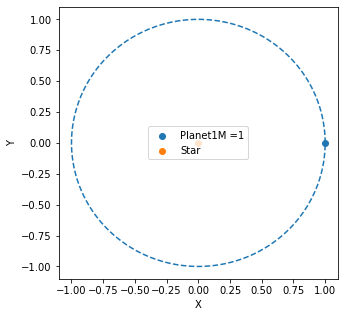

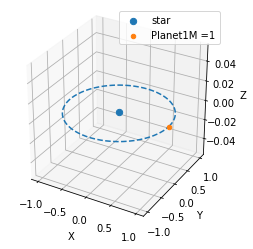

In [2]:
theta = np.array([0])
phi = np.array([0])
a = np.array([1])               #AU
e = np.array([0])
M_star = np.array([1])   
M_planet = np.array([9.55E-4])

theta_1 = 0
phi = 0 
sig = 0
x = [theta,M_planet,M_star,phi,a,e,theta_1,phi,sig]
System = cs.get_planet(x)
System.calculate_params()
System.graph('2D')
System.graph('3D')

In [3]:
V = System.V_vec
R = System.R_vec

print('Position vector:',R)
print('Velocity Vector:',V)
### Now we need to include the star, since we technically have not included.
R_ = np.vstack((R,np.array([0,0,0])))
print('Combined R vector: ', R_)

V_ = np.vstack((V,np.array([0,0,0])))*(1/AU)*(365.25*24*60*60) #needs to be AU per year.
print('Combined V vector: ', V_)

Position vector: [[1. 0. 0.]]
Velocity Vector: [[    0.         29860.94843958     0.        ]]
Combined R vector:  [[1. 0. 0.]
 [0. 0. 0.]]
Combined V vector:  [[0.         6.32442863 0.        ]
 [0.         0.         0.        ]]


In [4]:
### Now we also need to create an array of masses, the the code this will be generated for us.
Mass = np.vstack((M_planet,M_star))
print('Mass array:',Mass)   #solar mass

Mass array: [[9.55e-04]
 [1.00e+00]]


In [5]:
import clustersimpy as cp

In [6]:
Dat = cp.data('TEST_1P_1S_1AU_CIRC.dat')
Dat.write(R_,V_,2,0,Mass,Length_unit=1.496E+13)

TEST_1P_1S_1AU_CIRC.dat  sucessfully written to directory!


In [7]:
Dat.read()

N =  2
time 0.0
units:  1.9884699e+33 14960000000000.0 31556952.0
mass array [9.55e-04 1.00e+00]
TEST_1P_1S_1AU_CIRC.dat  Data Read successfully!


[1. 0. 0.]
[0.         6.32442863 0.        ]
0.9923487454965412
0.007710247569900908


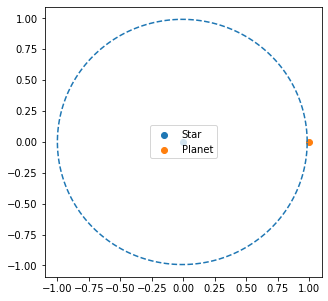

In [8]:
R = np.vstack((Dat.x,Dat.y,Dat.z)).T
V = np.vstack((Dat.vx,Dat.vy,Dat.vz)).T
print(R[0])
print(V[0])
R_ = np.array([1,0,0])
V_ = np.array([0,6.3/((1/AU)*(365.25*24*60*60)),0])
data = [1,9.55E-4,R_,V_]
Datmeas = cp.measure(data)
a = Datmeas.calculate_a()
print(a)
e = Datmeas.calculate_e(a)
print(e)
Datmeas.graph("2D",a,e)